# Module Association with Cell Proportion

**Created**: 14 October 2021

## Environment

In [1]:
if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

if (!requireNamespace("xCell")) {
    library(remotes)
    install_github("dviraran/xCell")
}

Loading required namespace: patchwork

Loading required namespace: xCell



In [2]:
library(tidyverse)
library(RColorBrewer)
library(patchwork)
library(xCell)

setwd("~/eQTL_pQTL_Characterization/")

source("04_Expression/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load Data

In [3]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")
gene.info <- read.table("/nfs/team282/data/gains_team282/Gene_info_864_20416.txt")

In [4]:
head(gene.exp)

,UK02270173_3,UK15130120_3,UK58000006_3,UK47010004_3,UK42020088_5,UK47490007_3,UK02770164_3,UK02770164_5,UK02630151_3,UK42150107_1,⋯,UK59070043_3,UK59070043_5,UK02510223_3,UK02XX0336_5,UK29090086_3,UK02XX0335_1,UK02XX0334_3,UK01210130_3,UK01210130_5,UK01380125_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000230521,0.6644339,0.58271604,0.4046756,0.20905157,0.2211571,0.4288519,0.5133516,0.57768877,0.6990766,0.3812037,⋯,0.3823184,0.5423684,0.86762630,0.73833461,0.6461583,0.1227063,0.9621386,0.65838459,1.03561474,0.4457301
ENSG00000225864,0.9817872,0.43879936,0.6022344,0.92340489,0.2211571,1.1450686,0.1921362,0.57768877,0.1974851,1.2290495,⋯,0.6842527,0.8539227,0.91886777,0.12581620,0.5511865,0.4384007,0.5465139,0.40803066,0.46899151,0.3544115
ENSG00000227766,1.2117156,0.30682669,0.6625010,0.79963286,0.6445686,0.3130290,0.1183231,0.16750450,0.1505900,1.0533199,⋯,0.4901384,0.4340781,0.37504164,0.04316943,0.6151905,0.3406488,0.3147798,0.43511377,0.17382742,0.1157514
ENSG00000237669,0.6420763,0.69256830,0.9792012,0.69929584,0.3765156,1.0756817,0.8912050,0.60129641,0.8534668,1.0533199,⋯,1.0790156,0.6102946,1.03953331,0.97965846,0.7061683,0.7489857,0.7919934,0.85168813,0.69120049,1.0798771
ENSG00000271581,2.4744895,1.33153140,1.8310464,2.47531701,1.8812042,2.0531366,0.5972544,1.00686213,1.2811361,2.4244938,⋯,2.4728831,1.5338898,1.59080138,0.62923925,1.2804253,1.4727511,1.2187650,1.46471386,1.44139443,1.1896250
ENSG00000285647,0.0000000,0.03379072,0.0000000,0.05517067,0.6748270,0.0000000,0.0000000,0.03509293,0.6990766,1.6556266,⋯,3.4117627,2.4012963,0.04682116,0.00000000,0.0000000,0.4695662,0.3762952,0.07078527,0.07206309,0.4159282


Some patient identifiers may have a GA- prefix that has been dropped in future releases of the data. If this identifier exists, I drop the prefix.

In [5]:
head(gene.info)

,seqnames,start,end,width,strand,source,type,score,phase,gene_id,⋯,transcript_source,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1248375,X,100627108,100639991,12884,-,ensembl_havana,gene,NA,NA,ENSG00000000003,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2612838,20,50934867,50958555,23689,-,ensembl_havana,gene,NA,NA,ENSG00000000419,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
198068,1,169849631,169894267,44637,-,ensembl_havana,gene,NA,NA,ENSG00000000457,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
197489,1,169662007,169854080,192074,+,ensembl_havana,gene,NA,NA,ENSG00000000460,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46865,1,27612064,27635185,23122,-,ensembl_havana,gene,NA,NA,ENSG00000000938,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
213754,1,196652043,196747504,95462,+,ensembl_havana,gene,NA,NA,ENSG00000000971,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
ga.prefix.filter <- grepl("GA", rownames(gene.exp))

rownames(gene.exp)[ga.prefix.filter] <- gsub("^GA", "", rownames(gene.exp)[ga.prefix.filter])

In [7]:
modules <- read.csv("~/gains_team282/nikhil/expression/gene_expression/modules.csv")
eigengenes <- read.csv("~/gains_team282/nikhil/expression/gene_expression/eigengenes.csv", row.names=1)
variance.explained <- read.csv("~/gains_team282/nikhil/expression/gene_expression/variance.explained.csv")

In [8]:
head(eigengenes)

,ME_1,ME_2,ME_3,ME_4,ME_5,ME_6,ME_7,ME_8,ME_9,ME_10,⋯,ME_97,ME_98,ME_99,ME_100,ME_101,ME_102,ME_103,ME_104,ME_105,ME_106
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK02270173_3,0.008640296,0.007926439,0.0147219682,-0.011774847,0.029042358,-0.006588595,-0.004034583,-0.013647582,0.020445938,0.03657146,⋯,0.105461618,0.014671996,-0.03186240,-0.019044546,-0.001067989,0.03791366,0.008340969,-0.002505741,0.033258706,-0.003317747
UK15130120_3,-0.037073495,-0.033179470,-0.0311931107,-0.006189163,0.039065099,-0.011809051,0.037283445,-0.060021257,-0.036280957,0.03133065,⋯,-0.006444524,-0.019642856,0.01880373,-0.044684726,-0.043663066,-0.02550290,0.031624201,-0.011931533,0.051184001,-0.012327128
UK58000006_3,0.029670524,0.021490110,0.0369543066,-0.015010027,-0.004745170,0.023133390,-0.027585817,0.010804862,0.044649369,-0.01014143,⋯,0.085257258,-0.006499496,-0.01582150,0.030709065,0.040952839,0.04332857,-0.003376643,0.012633897,-0.006622840,-0.004740631
UK47010004_3,0.011954974,0.007360515,0.0073725862,-0.011608271,-0.011341294,-0.025127169,-0.009500677,0.013387153,0.007126337,-0.02607067,⋯,0.075920669,-0.016223383,0.02515734,-0.008023902,0.018023055,-0.01461801,0.010948287,0.023381207,-0.003072117,0.012014706
UK42020088_5,0.009818957,0.008322535,0.0004121376,-0.008882007,-0.028000468,0.002082996,-0.009532910,0.011477800,-0.001521594,-0.02223628,⋯,0.035896079,0.009274050,0.03406072,-0.005459722,0.037120618,-0.01089588,-0.008355454,-0.034402696,-0.032697222,0.007915598
UK47490007_3,-0.021930377,-0.024756322,-0.0294342468,-0.007742353,-0.005486842,-0.049842615,0.020825112,0.007441717,-0.030615907,-0.01853294,⋯,0.092538453,0.067616309,0.02790283,-0.036887001,-0.017742254,0.01562787,0.026717734,-0.009877409,-0.003607270,0.024871961


In [9]:
sample.info <- read.table("/nfs/team282/data/gains_team282/Sample_info_864.txt")
ga.prefix.filter <- grepl("GA", sample.info$supplier_name)
sample.info$supplier_name[ga.prefix.filter] <- gsub("^GA", "", sample.info$supplier_name[ga.prefix.filter])
sample.info <- sample.info %>% 
  dplyr::filter(supplier_name %in% rownames(eigengenes))
rownames(sample.info) <- sample.info$supplier_name
sample.info <- sample.info[rownames(eigengenes),]

In [10]:
head(sample.info)

,manual_qc,id_study_lims,name,description,sanger_sample_id,supplier_name,last_updated,id_library_lims,id_pool_lims,id_iseq_flowcell_tmp,⋯,TIN.mean.,TIN.median.,TIN.stdev.,Concentration,num_samples_per_lane,SRSUnsup,globin_rate_fromcounts,PCOutlier,OtherOutlier,GAinSID
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<lgl>,<lgl>,<chr>
UK02270173_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032857,UK02270173_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930558,⋯,69.51307,76.82800,23.72743,116.731,77,2,0.6790401,FALSE,FALSE,UK02270173
UK15130120_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032858,UK15130120_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930559,⋯,65.03706,71.49895,24.13243,76.185,77,2,0.6826886,FALSE,FALSE,UK15130120
UK58000006_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032859,UK58000006_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930560,⋯,70.85535,78.07773,23.24183,59.767,77,2,1.4290063,FALSE,FALSE,UK58000006
UK47010004_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032860,UK47010004_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930561,⋯,68.16224,75.05450,23.56361,105.000,77,1,0.9177558,FALSE,FALSE,UK47010004
UK42020088_5,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032861,UK42020088_5,2019-09-30 21:01:38,DN548016D,NT1557159B,6930562,⋯,64.67378,72.53810,26.03766,87.843,77,1,0.4031685,FALSE,FALSE,UK42020088
UK47490007_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032862,UK47490007_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930563,⋯,62.79935,68.60305,24.27960,67.484,77,2,1.1993500,FALSE,FALSE,UK47490007


In [11]:
srs.info <- read.table("/nfs/team282/data/gains_team282/full-gains-SRS-predictions_mNN-RF.tsv", header=T)
ga.prefix.filter <- grepl("GA", srs.info$Sample_id)
srs.info$Sample_id[ga.prefix.filter] <- gsub("^GA", "", srs.info$Sample_id[ga.prefix.filter])
srs.info <- srs.info %>%
  dplyr::filter(Assay=="RNA-seq")
row.names(srs.info) <- srs.info$Sample_id
srs.info <- srs.info[rownames(eigengenes),]

In [12]:
cell.prop <- read.table("04_Expression/data/gene_expression/Cell_props_864.txt", header=TRUE)
ga.prefix.filter <- grepl("GA", cell.prop$Sample)
cell.prop$Sample[ga.prefix.filter] <- gsub("^GA", "", cell.prop$Sample[ga.prefix.filter])
rownames(cell.prop) <- cell.prop$Sample
cell.prop <- cell.prop[rownames(eigengenes),]

In [13]:
head(cell.prop)

,Sample,GAinSID,Day,Neutrophils,Lymphocytes,Monocytes
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
UK02270173_3,UK02270173_3,UK02270173,3,0.8000000,0.11000000,0.09000000
UK15130120_3,UK15130120_3,UK15130120,3,NA,NA,NA
UK58000006_3,UK58000006_3,UK58000006,3,0.8875740,0.06508876,0.04733728
UK47010004_3,UK47010004_3,UK47010004,3,0.8813559,0.06779661,0.05084746
UK42020088_5,UK42020088_5,UK42020088,5,0.8857143,0.07857143,0.03571429
UK47490007_3,UK47490007_3,UK47490007,3,0.9183673,0.05102041,0.03061224


Data from Aran *et al.* on xCell cell type groups and subgroups.

In [14]:
xcell.info <- read.csv("04_Expression/data/xCell_Aran_et_al_Additional_File_1.csv")

In [15]:
head(xcell.info)

,Full.name,Cell.types,FANTOM5,ENCODE,Blueprint,IRIS,Novershtern,HPCA,X..of.sources,X..of.samples,Group,Subgroup,Parent.Child
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,Monocytes,Monocytes,42,0,16,12,5,66,5,141,Non-lymphocytes,Myeloid,Parent
2,CD8+ T-cells,CD8+ T-cells,11,0,3,4,7,16,5,41,Lymphocytes,Lymphoid,Parent
3,NK cells,NK cells,3,0,3,15,6,5,5,32,Lymphocytes,Lymphoid,Parent
4,Macrophages,Macrophages,27,0,18,12,0,59,4,116,Non-lymphocytes,Myeloid,Parent
5,Endothelial cells,Endothelial cells,22,14,4,0,0,48,4,88,Non-Hematopoietic,Stroma,Parent
6,Dendritic cells,DC,4,0,1,6,0,45,4,56,Non-lymphocytes,Myeloid,Parent


Andrew's cell proportion data from CIBERSORTx.

In [16]:
cibersort <- read.csv("/nfs/team282/data/gains_team282/CIBERSORTx_results_AK.csv", check.names=F) %>%
    dplyr::mutate(Mixture = gsub("^GA", "", Mixture))

rownames(cibersort) <- cibersort$Mixture
cibersort$Mixture <- NULL

cibersort <- cibersort[rownames(eigengenes), ]

cibersort.cells <- setdiff(colnames(cibersort), c("P-value", "Correlation", "RMSE"))

In [17]:
head(cibersort)

,Plasmablasts,Naive_CD4_T_cells,Cycling_TNK,Classical_monocytes,Platelets,Degranulating_neutrophils,Memory_CD4_T_cells,IL1R2+_immature_neutrophils,B_cells,Mast_cells/eosiniophils,⋯,Eosinophils,PADI4+_immature_neutrophils,Non-classical_monocytes,MPO+_immature_neutrophils_or_progenitors,Cycling_neutrophil_progenitors,cDCs,pDCs,P-value,Correlation,RMSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
UK02270173_3,0.002587463,0.06240293,0.025304667,0.14122020,0.028576696,0.17304507,0.047610972,0.00000000,0.042188070,0.032867681,⋯,0.07595217,0.0265399196,0.000000000,0.000000000,0.008307176,0.013896090,0.0098219835,0,0.9228048,0.5286800
UK15130120_3,0.007485518,0.04189009,0.043211647,0.21292483,0.033153277,0.09568995,0.042100878,0.00000000,0.033106307,0.029698631,⋯,0.14224013,0.0054693667,0.000000000,0.001948560,0.000000000,0.023528711,0.0003006227,0,0.9613907,0.5925058
UK58000006_3,0.005166643,0.04911193,0.004555653,0.20661471,0.013830549,0.25222201,0.000000000,0.00000000,0.006049652,0.056401672,⋯,0.09261022,0.0004539385,0.000000000,0.020240530,0.000000000,0.001524024,0.0128173798,0,0.9061977,0.5187117
UK47010004_3,0.029317591,0.04000250,0.012019231,0.13158449,0.080433205,0.12358058,0.028677521,0.00000000,0.002300188,0.019650291,⋯,0.10911732,0.0067900250,0.000000000,0.002803525,0.030410629,0.009622013,0.0029595447,0,0.9571191,0.3836744
UK42020088_5,0.007851050,0.06532631,0.019653015,0.08787784,0.009519258,0.00000000,0.009907089,0.02729479,0.027490615,0.003968353,⋯,0.12150795,0.0023784126,0.083168448,0.007112987,0.098829359,0.000000000,0.0003846173,0,0.9590148,0.3016958
UK47490007_3,0.000000000,0.03298234,0.028323250,0.15217534,0.065702168,0.06347976,0.000000000,0.00000000,0.021043950,0.017268285,⋯,0.14989409,0.0028485856,0.004148339,0.001476537,0.000000000,0.015097725,0.0029055567,0,0.9450907,0.4090116


In [18]:
cibersort.info <- read.csv("04_Expression/data/kwok_2022_cell_types.csv")

In [19]:
head(cibersort.info)

,ID,Lineage,Name
,<chr>,<chr>,<chr>
1,Apoptosing_neutrophils,MYELOID,Apoptosing neutrophils
2,B_cells,B,B cells
3,CD8_T_cells,CD8,CD8+ T cells
4,cDCs,MYELOID,Classical dendritic cells
5,Classical_monocytes,MYELOID,Classical monocytes
6,Cycling_neutrophil_progenitors,MYELOID,Cycling neutrophil progenitors


In [20]:
cibersort.markers <- read.csv("04_Expression/data/kwok_2022_cell_markers.csv")

In [21]:
head(cibersort.markers)

,cluster_id,gene,pct.1,pct.2,comb_adj_p_val,p_val_adj,mLog2FC,fine_annot
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0(clustering_res_0.8),PTAFR,0.583,0.497,0,NA,0.6827514,Mature_neutrophils
2,0(clustering_res_0.8),CSF3R,0.981,0.843,0,NA,0.5986353,Mature_neutrophils
3,0(clustering_res_0.8),SMAP2,0.918,0.854,0,NA,0.6814344,Mature_neutrophils
4,0(clustering_res_0.8),TXNIP,0.974,0.931,0,NA,0.9426138,Mature_neutrophils
5,0(clustering_res_0.8),MCL1,0.896,0.863,0,NA,0.4954592,Mature_neutrophils
6,0(clustering_res_0.8),TAGLN2,0.855,0.754,0,NA,0.7911203,Mature_neutrophils


## Association with SRSq

Built a correlation matrix comparing module eigengenes with SRSq for samples.

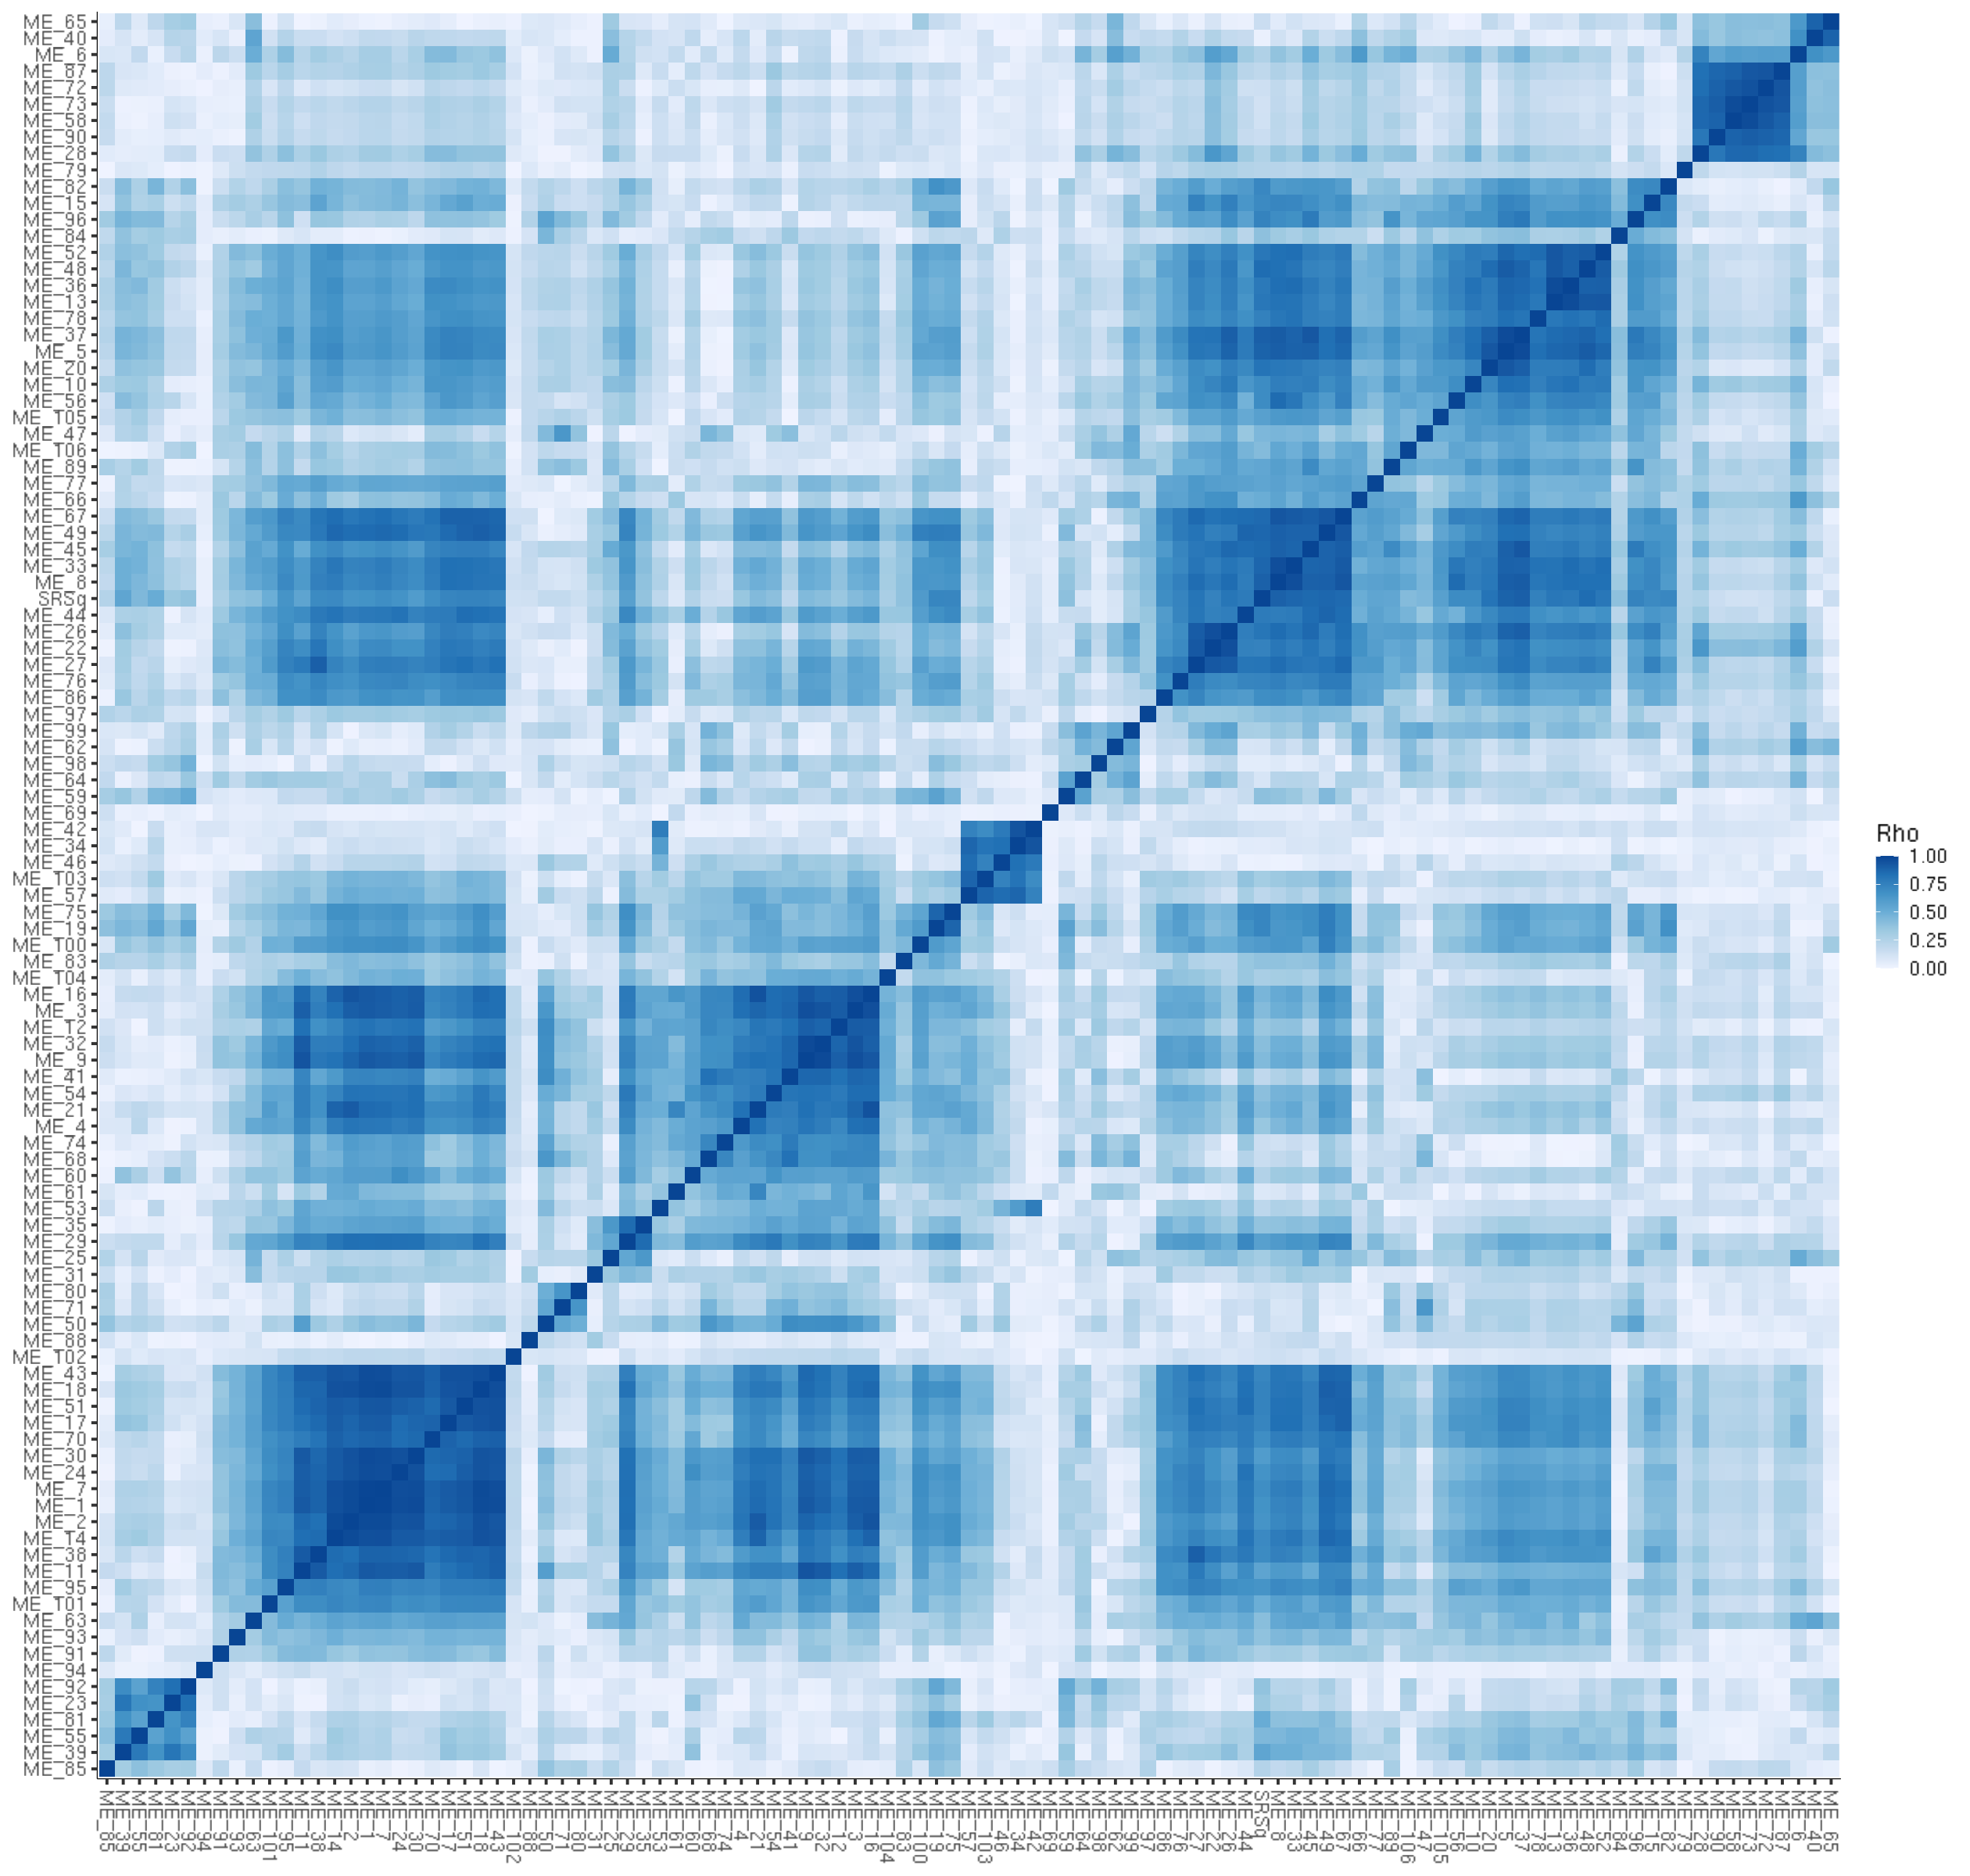

In [22]:
variables <- cbind(eigengenes, srs.info$SRSq)
colnames(variables)[ncol(variables)] <- "SRSq"

rho.values <- abs(cor(variables, method="spearman", use="pairwise.complete.obs"))

rho.values.hclust <- hclust(as.dist(1 - rho.values))

options(repr.plot.width=21, repr.plot.height=20)
rho.values %>%
  as.data.frame() %>%
  dplyr::mutate(Variable.2=rownames(.)) %>%
  tidyr::gather("Variable.1", "Rho", -Variable.2) %>%
  dplyr::mutate(Variable.1=factor(Variable.1, levels=colnames(rho.values)[rho.values.hclust$order])) %>%
  dplyr::mutate(Variable.2=factor(Variable.2, levels=colnames(rho.values)[rho.values.hclust$order])) %>%
  ggplot() +
  geom_raster(aes(x=Variable.1, y=Variable.2, fill=Rho)) +
  scale_fill_distiller(palette="Blues", limits=c(0, 1), direction=1) +
  ggplot_theme +
  theme(axis.title=element_blank(), axis.text.x=element_text(angle=270, vjust=0.5, hjust=0), legend.position="right")
ggsave("04_Expression/results/eigengene_association_with_srsq.svg", width=21, height=20)

Performed significance tests for correlation for Spearman's $\rho$. A significance compares the null hypothesis that $\rho=0$ versus the alternate that $\rho\neq 0$. I use Benjamini-Hochberg p-value adjustment to control for the False Discovery Rate.

In [23]:
estimates <- lapply(colnames(eigengenes), function(eigengene.name) {
  test.result = cor.test(srs.info$SRSq, eigengenes[,eigengene.name], alternative="two.sided", method="spearman", exact=FALSE)
  return(c(test.result$estimate, test.result$p.value))
}) %>%
  do.call(rbind, .) %>%
  as.data.frame() %>%
  dplyr::select(Rho=1, P.Value=2) %>%
  dplyr::mutate(Eigengene=colnames(eigengenes)) %>%
  dplyr::arrange(desc(abs(Rho))) %>%
  dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
  dplyr::mutate(Association.Variable="SRSq", Association.Variable.Type="SRSq", Statistic.Type="Rho") %>%
  dplyr::select(Eigengene, Association.Variable, Association.Variable.Type, Statistic=Rho, Statistic.Type, P.Value, Adjusted.P.Value)

write.csv(estimates, "~/gains_team282/nikhil/expression/gene_expression/estimates.eigengene.srsq.association.csv")

In [24]:
tail(estimates)

,Eigengene,Association.Variable,Association.Variable.Type,Statistic,Statistic.Type,P.Value,Adjusted.P.Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
101,ME_34,SRSq,SRSq,-0.05190019,Rho,0.1274172,0.1337250
102,ME_98,SRSq,SRSq,-0.05121780,Rho,0.1325047,0.1377010
103,ME_69,SRSq,SRSq,0.04787643,Rho,0.1597114,0.1643632
104,ME_94,SRSq,SRSq,0.02438603,Rho,0.4740725,0.4831892
105,ME_46,SRSq,SRSq,0.02002177,Rho,0.5567173,0.5619561
106,ME_40,SRSq,SRSq,-0.01975659,Rho,0.5619561,0.5619561


## Association with Cell Proportion

Relative cell proportions were measured for most of the samples that have transcriptomic data. There is a large expansion of inflammatory cells during sepsis (especially neutrophils). Similar to SRSq, I perform a significance test for association with Spearman's $\rho$ and adjust p-values using the Benjamini-Hochberg FDR correction.

In [25]:
cell.prop.vars <- cell.prop[,c("Neutrophils", "Lymphocytes", "Monocytes")]

estimates <- lapply(colnames(eigengenes), function(eigengene.name) {
    lapply(colnames(cell.prop.vars), function(cell.type) {
      test.result = cor.test(cell.prop.vars[,cell.type], eigengenes[,eigengene.name], alternative="two.sided", method="spearman", exact=FALSE)
      return(c(test.result$estimate, test.result$p.value, cell.type))
    }) %>%
      do.call(rbind, .) %>%
      as.data.frame() %>%
      dplyr::mutate(Eigengene=eigengene.name)
}) %>%
  do.call(rbind, .) %>%
  as.data.frame() %>%
  dplyr::select(Rho=1, P.Value=2, Association.Variable=3, Eigengene) %>%
  dplyr::mutate(Rho=as.numeric(Rho), P.Value=as.numeric(P.Value)) %>%
  dplyr::arrange(desc(abs(Rho))) %>%
  dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
  dplyr::mutate(Association.Variable.Type="Cell Proportion", Statistic.Type="Rho") %>%
  dplyr::select(Eigengene, Association.Variable, Association.Variable.Type, Statistic=Rho, Statistic.Type, P.Value, Adjusted.P.Value)

write.csv(estimates, "~/gains_team282/nikhil/expression/gene_expression/estimates.eigengene.cell.proportion.association.csv")

## Association with CIBERSORTx

Andrew ran CIBERSORTx to infer cell proportions from the bulk RNA-seq data using scRNA-seq.

In [26]:
estimates <- lapply(colnames(eigengenes), function(eigengene.name) {
    lapply(cibersort.cells, function(cell.type) {
        test.result = cor.test(cibersort[, cell.type], eigengenes[, eigengene.name], alternative="two.sided", method="spearman", exact=FALSE)
        return(c(test.result$estimate, test.result$p.value, cell.type))
    }) %>%
        do.call(rbind, .) %>%
        as.data.frame() %>%
        dplyr::mutate(Eigengene=eigengene.name)
}) %>%
    do.call(rbind, .) %>%
    as.data.frame() %>%
    dplyr::select(Rho=1, P.Value=2, Association.Variable=3, Eigengene) %>%
    dplyr::mutate(Rho=as.numeric(Rho), P.Value=as.numeric(P.Value)) %>%
    dplyr::arrange(desc(abs(Rho))) %>%
    dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
    dplyr::mutate(Association.Variable.Type="CIBERSORTx Cell Proportion", Statistic.Type="Rho") %>%
    dplyr::select(Eigengene, Association.Variable, Association.Variable.Type, Statistic=Rho, Statistic.Type, P.Value, Adjusted.P.Value)

In [27]:
head(estimates)

,Eigengene,Association.Variable,Association.Variable.Type,Statistic,Statistic.Type,P.Value,Adjusted.P.Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ME_73,Plasmablasts,CIBERSORTx Cell Proportion,0.9764354,Rho,0.000000e+00,0.000000e+00
2,ME_58,Plasmablasts,CIBERSORTx Cell Proportion,0.9526476,Rho,0.000000e+00,0.000000e+00
3,ME_72,Plasmablasts,CIBERSORTx Cell Proportion,0.9192649,Rho,0.000000e+00,0.000000e+00
4,ME_87,Plasmablasts,CIBERSORTx Cell Proportion,0.9155202,Rho,0.000000e+00,0.000000e+00
5,ME_90,Plasmablasts,CIBERSORTx Cell Proportion,0.8711277,Rho,1.774698e-268,8.653427e-266
6,ME_28,Plasmablasts,CIBERSORTx Cell Proportion,0.8575483,Rho,4.411501e-251,1.792540e-248


In [28]:
write.csv(estimates, "~/gains_team282/nikhil/expression/gene_expression/estimates.eigengene.cibersort.cell.proportion.association.csv")

## Association with xCell Scores

xCell assigns enrichment scores to samples based on their transcriptomic profiles. xCell derives signatures of specific primary cell types from large consortium datasets.

In [29]:
gene.map <- data.frame(
  Ensembl.ID=rownames(gene.exp)
)

gene.map <- merge(gene.map, gene.info, by.x="Ensembl.ID", by.y="gene_id")
rownames(gene.map) <- gene.map$Ensembl.ID

# Remove genes with duplicate gene names
duplicated.genes <- gene.map$gene_name[duplicated(gene.map$gene_name)]
gene.map <- gene.map %>%
  dplyr::filter(!(gene_name %in% duplicated.genes))

# Remove genes without gene information
xcell.exp <- gene.exp[gene.map$Ensembl.ID,]
rownames(xcell.exp) <- gene.map$gene_name

xcell.analysis <- xCellAnalysis(xcell.exp)

[1] "Num. of genes: 8708"


Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
“Some gene sets have size one. Consider setting 'min.sz > 1'.”


Setting parallel calculations through a MulticoreParam back-end
with workers=4 and tasks=100.
Estimating ssGSEA scores for 488 gene sets.
  |======================================================================| 100%



I tested for significant association between cell proportions and xCell scores using Spearman's $\rho$ and adjust p-values using the Benjamini-Hochberg FDR correction. I expect the neutrophil, monocyte, and lymphocyte proportions to be associated with xCell scores for granulocytes/neutrophils, B/T/NK lymphocytes, and monocyte/macrophages.

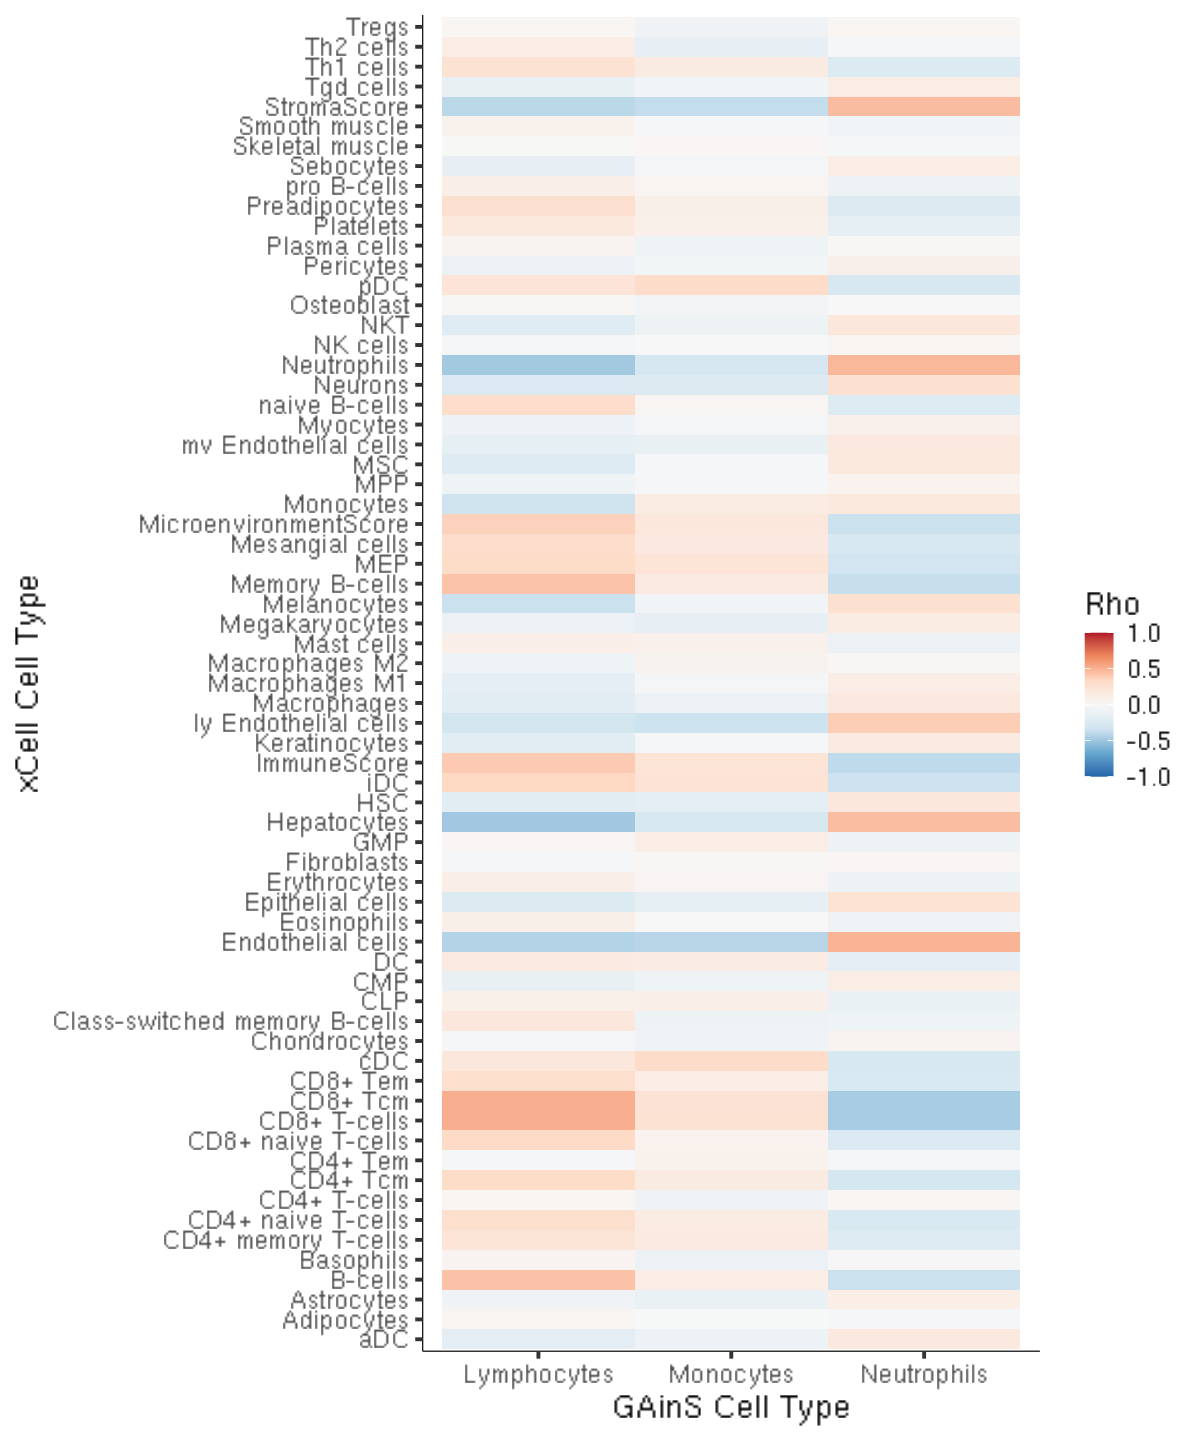

In [30]:
xcell.vars <- t(xcell.analysis)

estimates <- lapply(colnames(cell.prop.vars), function(gains.name) {
  lapply(colnames(xcell.vars), function(xcell.name) {
    test.result = cor.test(cell.prop.vars[,gains.name], xcell.vars[,xcell.name], alternative="two.sided", method="spearman", exact=FALSE)
    return(c(test.result$estimate, test.result$p.value, xcell.name))
  }) %>%
    do.call(rbind, .) %>%
    as.data.frame() %>%
    dplyr::mutate(GAinS.Cell.Type=gains.name) %>%
    dplyr::select(GAinS.Cell.Type, xCell.Cell.Type=3, Rho=1, P.Value=2) %>%
    dplyr::mutate(Rho=as.numeric(Rho), P.Value=as.numeric(P.Value))
}) %>%
  do.call(rbind, .) %>%
  as.data.frame() %>%
  dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
  dplyr::mutate(Significance=ifelse(Adjusted.P.Value < 0.05, "*", ""))

options(repr.plot.width=10, repr.plot.height=12)
ggplot(estimates) +
  geom_raster(aes(x=GAinS.Cell.Type, y=xCell.Cell.Type, fill=Rho)) +
  scale_fill_distiller(palette="RdBu", limits=c(-1, 1)) +
  xlab("GAinS Cell Type") + ylab("xCell Cell Type") +
  ggplot_theme +
  theme(legend.position="right")
ggsave("04_Expression/results/cell_type_prop_xcell_association.svg", width=10, height=12)

As done previously, I also tested for significant associations between module eigengenes and xCell scores using Spearman's $\rho$ with p-values adjusted using the Benjamini-Hochberg FDR correction.

In [31]:
estimates <- lapply(colnames(eigengenes), function(eigengene.name) {
  lapply(colnames(xcell.vars), function(xcell.name) {
    test.result = cor.test(eigengenes[,eigengene.name], xcell.vars[,xcell.name], alternative="two.sided", method="spearman", exact=FALSE)
    return(c(test.result$estimate, test.result$p.value, xcell.name))
  }) %>%
    do.call(rbind, .) %>%
    as.data.frame() %>%
    dplyr::mutate(Eigengene=eigengene.name) %>%
    dplyr::select(Eigengene, xCell.Cell.Type=3, Rho=1, P.Value=2) %>%
    dplyr::mutate(Rho=as.numeric(Rho), P.Value=as.numeric(P.Value))
}) %>%
  do.call(rbind, .) %>%
  as.data.frame() %>%
  dplyr::select(Rho, P.Value, Association.Variable=xCell.Cell.Type, Eigengene) %>%
  dplyr::mutate(Rho=as.numeric(Rho), P.Value=as.numeric(P.Value)) %>%
  dplyr::arrange(desc(abs(Rho))) %>%
  dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
  dplyr::mutate(Association.Variable.Type="xCell Score", Statistic.Type="Rho") %>%
  dplyr::select(Eigengene, Association.Variable, Association.Variable.Type, Statistic=Rho, Statistic.Type, P.Value, Adjusted.P.Value)

write.csv(estimates, "~/gains_team282/nikhil/expression/gene_expression/estimates.eigengene.xcell.score.association.csv")

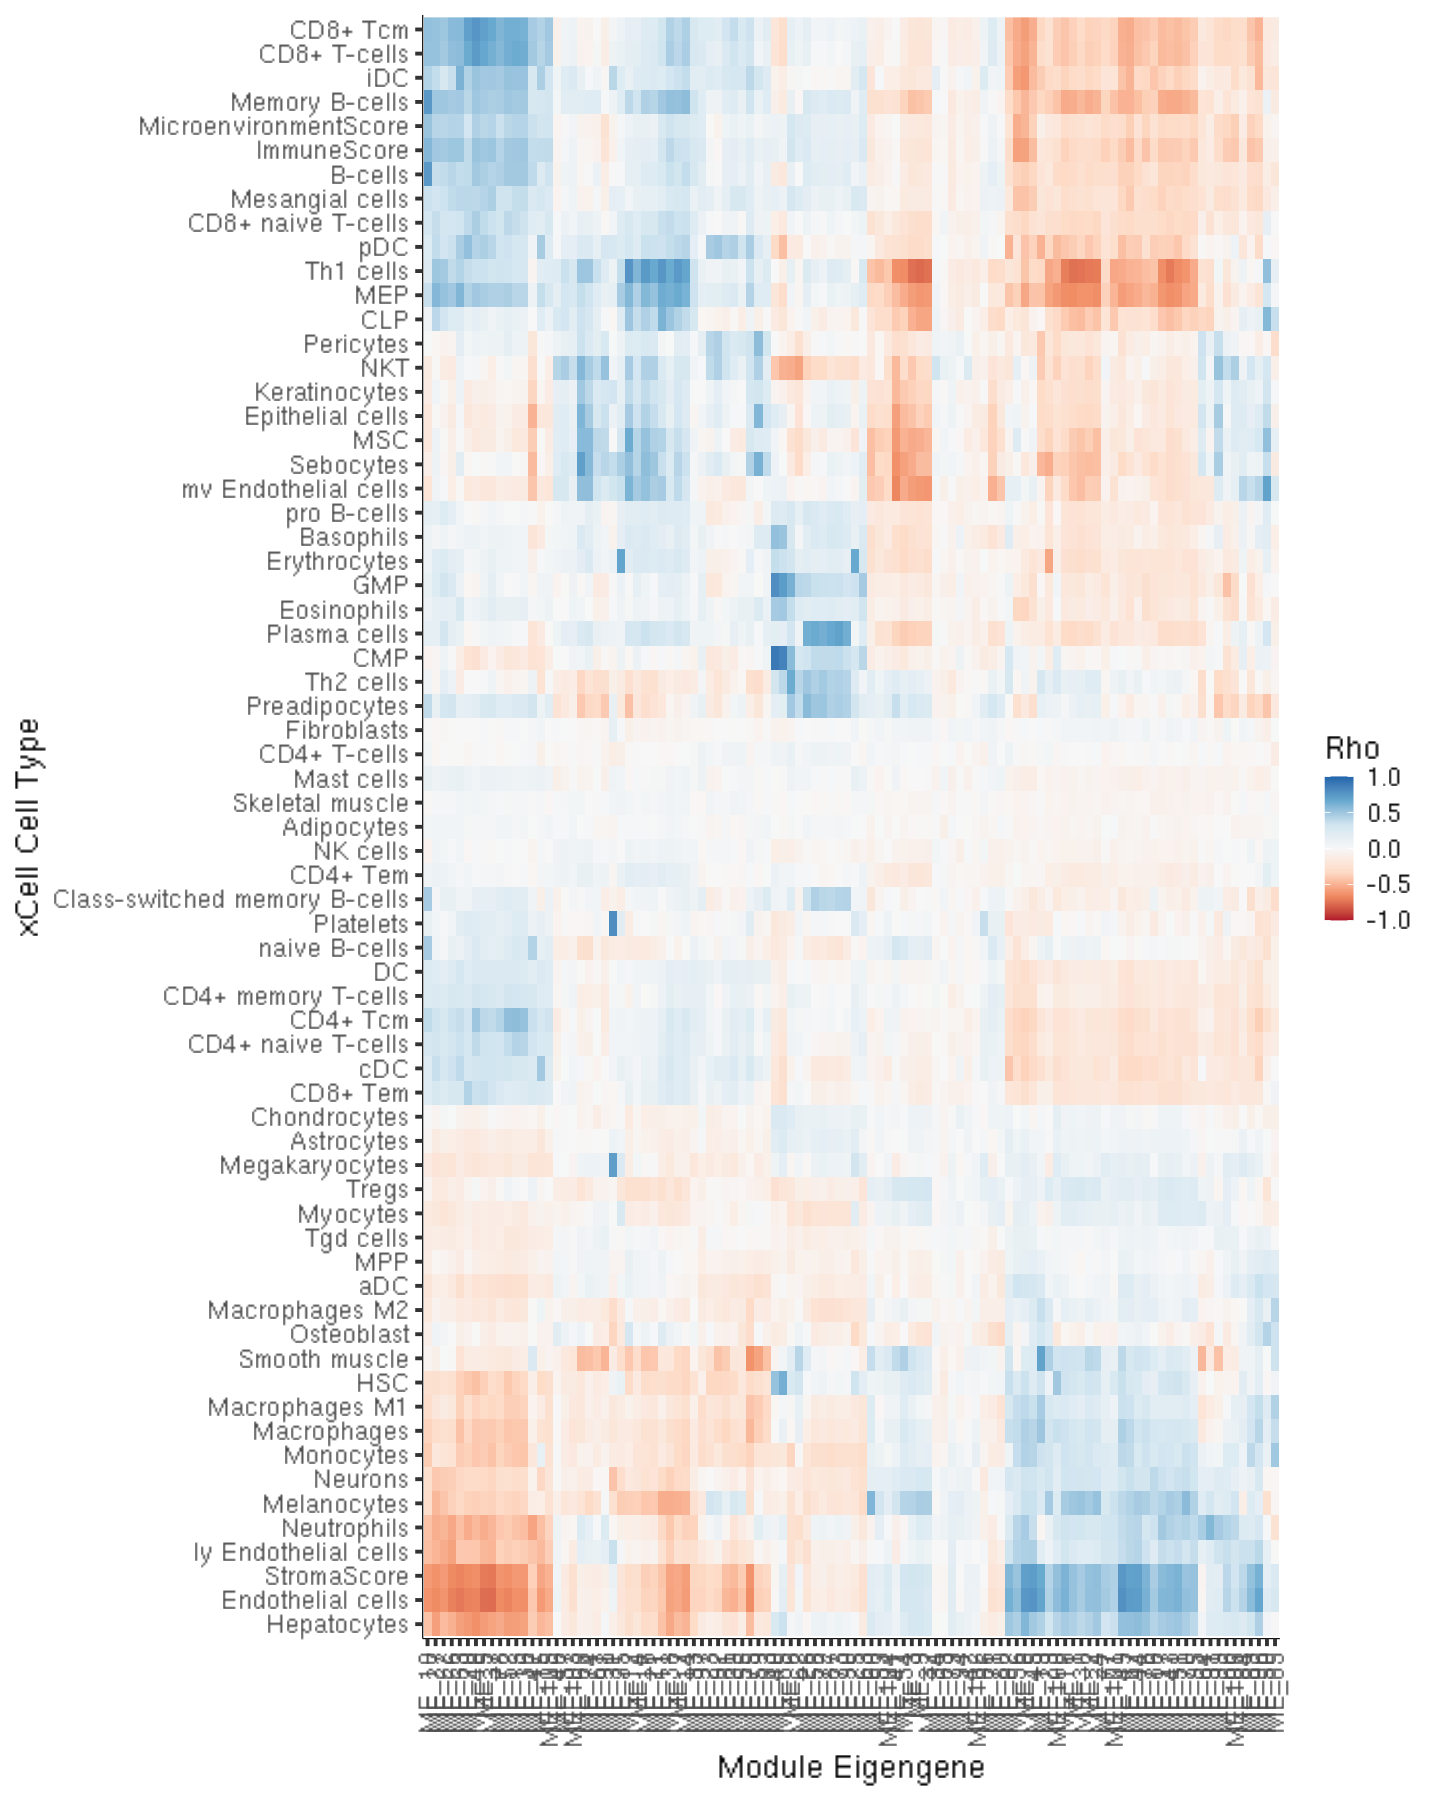

In [32]:
estimates <- estimates %>%
  dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
  dplyr::mutate(Significance=ifelse(Adjusted.P.Value < 0.05, "*", "")) %>%
  dplyr::select(xCell.Cell.Type=Association.Variable, Rho=Statistic, everything())

cor.mtx <- cor(eigengenes, xcell.vars, method="spearman")
eigengenes.h <- hclust(dist(cor.mtx))
cell.types.h <- hclust(dist(t(cor.mtx)))
plot.data <- estimates %>%
  dplyr::mutate(Eigengene=factor(Eigengene, levels=colnames(eigengenes)[eigengenes.h$order])) %>%
  dplyr::mutate(xCell.Cell.Type=factor(xCell.Cell.Type, levels=colnames(xcell.vars)[cell.types.h$order]))

options(repr.plot.width=12, repr.plot.height=15)
ggplot(plot.data) +
  geom_raster(aes(x=Eigengene, y=xCell.Cell.Type, fill=Rho)) +
  scale_fill_distiller(palette="RdBu", limits=c(-1, 1), direction=1) +
  xlab("Module Eigengene") + ylab("xCell Cell Type") +
  ggplot_theme +
  theme(legend.position="right", axis.text.x=element_text(angle=90, hjust=1, vjust=0.5))
ggsave("04_Expression/results/eigengene_xcell_association.svg", width=12, height=15)

## Overrepresentation Analysis with xCell Signatures

xCell enrichment scores are defined based on cell signatures (sets of genes associated with each primary cell type). We can test if any of these signatures are enriched in our modules. Depending on which dataset was used to derive the signature, the xCell list is slightly different. I test for overrepresentation in all signatures independently. For example, I would test for enrichment in all the different neutrophil signatures present in xCell.

I use Fisher's exact test (which is equivalent to a hypergeometric test with a one-sided alternative). The p-values are adjusted using Benjamini-Hochberg FDR correction. I report the mean, minimum, and maximum odds ratio for significant associations from a given cell type. For example, I would report the mean/medium/maximum odds ratio for the different neutrophil signatures.

In [33]:
# Reduce Modules to Genes with Gene Names
modules.list <- modules %>%
  dplyr::filter(Gene %in% gene.map$Ensembl.ID) %>%
  merge(., gene.map, by.x="Gene", by.y="Ensembl.ID") %>%
  dplyr::select(Gene=gene_name, Module) %>%
  split(., .$Module)

# Perform Overrepresentation Test

signature.cell.types <- sapply(strsplit(names(xCell.data$signatures), "%"), function(x) { x[1] })
unique.cell.types <- unique(signature.cell.types)

gene.lists <- list()

for (cell.type in unique.cell.types) {
  n.signatures = sum(signature.cell.types == cell.type)
  gene.lists[[cell.type]] = lapply(1:n.signatures, function(i) {
    xCell.data$signatures[signature.cell.types == cell.type][[i]]@geneIds
  })
}

ora.results <- list()
ora.results[["Module"]] <- list()
ora.results[["Cell.Type"]] <- list()
ora.results[["Overlap"]] <- list()
ora.results[["N.Gene.Set"]] <- list()
ora.results[["N.Module"]] <- list()
ora.results[["N.Not.Gene.Set"]] <- list()
ora.results[["P.Value"]] <- list()
ora.results[["xCell.Genes"]] <- list()
ora.results[["Module.Overlap.Genes"]] <- list()
    
counter <- 0

for (module in names(modules.list)) {

    for (cell.type in unique.cell.types) {

        for (i in 1:length(gene.lists[[cell.type]])) {

            counter <- counter + 1

            gene.list = gene.lists[[cell.type]][[i]]
            module.list = modules.list[[module]]$Gene

            within.module.and.gene.set = length(intersect(gene.list, module.list))
            within.gene.set = length(intersect(gene.list, gene.map$gene_name))
            not.within.gene.set = length(setdiff(gene.map$gene_name, gene.list))
            within.module = length(module.list)

            p.value = phyper(
                within.module.and.gene.set - 1,
                within.gene.set,
                not.within.gene.set,
                within.module,
                lower.tail=F
            )

            ora.results[["Module"]][[counter]] <- module
            ora.results[["Cell.Type"]][[counter]] <- cell.type
            ora.results[["Overlap"]][[counter]] <- within.module.and.gene.set
            ora.results[["N.Gene.Set"]][[counter]] <- within.gene.set
            ora.results[["N.Module"]][[counter]] <- within.module
            ora.results[["N.Not.Gene.Set"]][[counter]] <- not.within.gene.set
            ora.results[["P.Value"]][[counter]] <- p.value
            ora.results[["xCell.Genes"]][[counter]] <- paste0(gene.list, collapse="|")
            ora.results[["Module.Overlap.Genes"]][[counter]] <- paste0(intersect(gene.list, module.list), collapse="|")
        }
    }
}

ora.results.df <- as.data.frame(lapply(ora.results, unlist))

filtered.cell.type.enrichment <- ora.results.df %>%
    dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
    dplyr::filter(Adjusted.P.Value < 0.05) %>%
    dplyr::mutate(Enrichment=(Overlap / N.Module) / (N.Gene.Set / N.Not.Gene.Set)) %>%
    dplyr::group_by(Module, Cell.Type) %>%
    dplyr::summarize(
        Mean.Enrichment=mean(Enrichment), Median.Enrichment=median(Enrichment),
        Enrichment.Min=min(Enrichment), Enrichment.Max=max(Enrichment),
        .groups="drop"
    ) %>%
    dplyr::arrange(Module, desc(Median.Enrichment))

write.csv(filtered.cell.type.enrichment, "~/gains_team282/nikhil/expression/gene_expression/module.xcell.signature.enrichment.csv")

In [34]:
filtered.cell.type.enrichment.with.gene.markers <- ora.results.df %>%
    dplyr::mutate(Adjusted.P.Value = p.adjust(P.Value, method="BH")) %>%
    dplyr::filter(Adjusted.P.Value < 0.05) %>%
    dplyr::mutate(Enrichment=(Overlap / N.Module) / (N.Gene.Set / N.Not.Gene.Set)) %>%
    dplyr::group_by(Module, Cell.Type) %>%
    dplyr::summarize(
        Mean.Enrichment=mean(Enrichment), Median.Enrichment=median(Enrichment), Enrichment.Min=min(Enrichment), Enrichment.Max=max(Enrichment),
        xCell.Genes=paste0(xCell.Genes, collapse="|"), Module.Overlap.Genes=paste0(Module.Overlap.Genes, collapse="|"),
        .groups="drop"
    ) %>%
    dplyr::mutate(xCell.Genes = sapply(strsplit(xCell.Genes, "\\|"), function(x) { paste0(unique(x), collapse="|") })) %>%
    dplyr::mutate(Module.Overlap.Genes = sapply(strsplit(Module.Overlap.Genes, "\\|"), function(x) { paste0(unique(x), collapse="|") })) %>%
    dplyr::arrange(Module, desc(Median.Enrichment))

write.csv(filtered.cell.type.enrichment.with.gene.markers, "~/gains_team282/nikhil/expression/gene_expression_annotations/xCell_Signatures.csv")

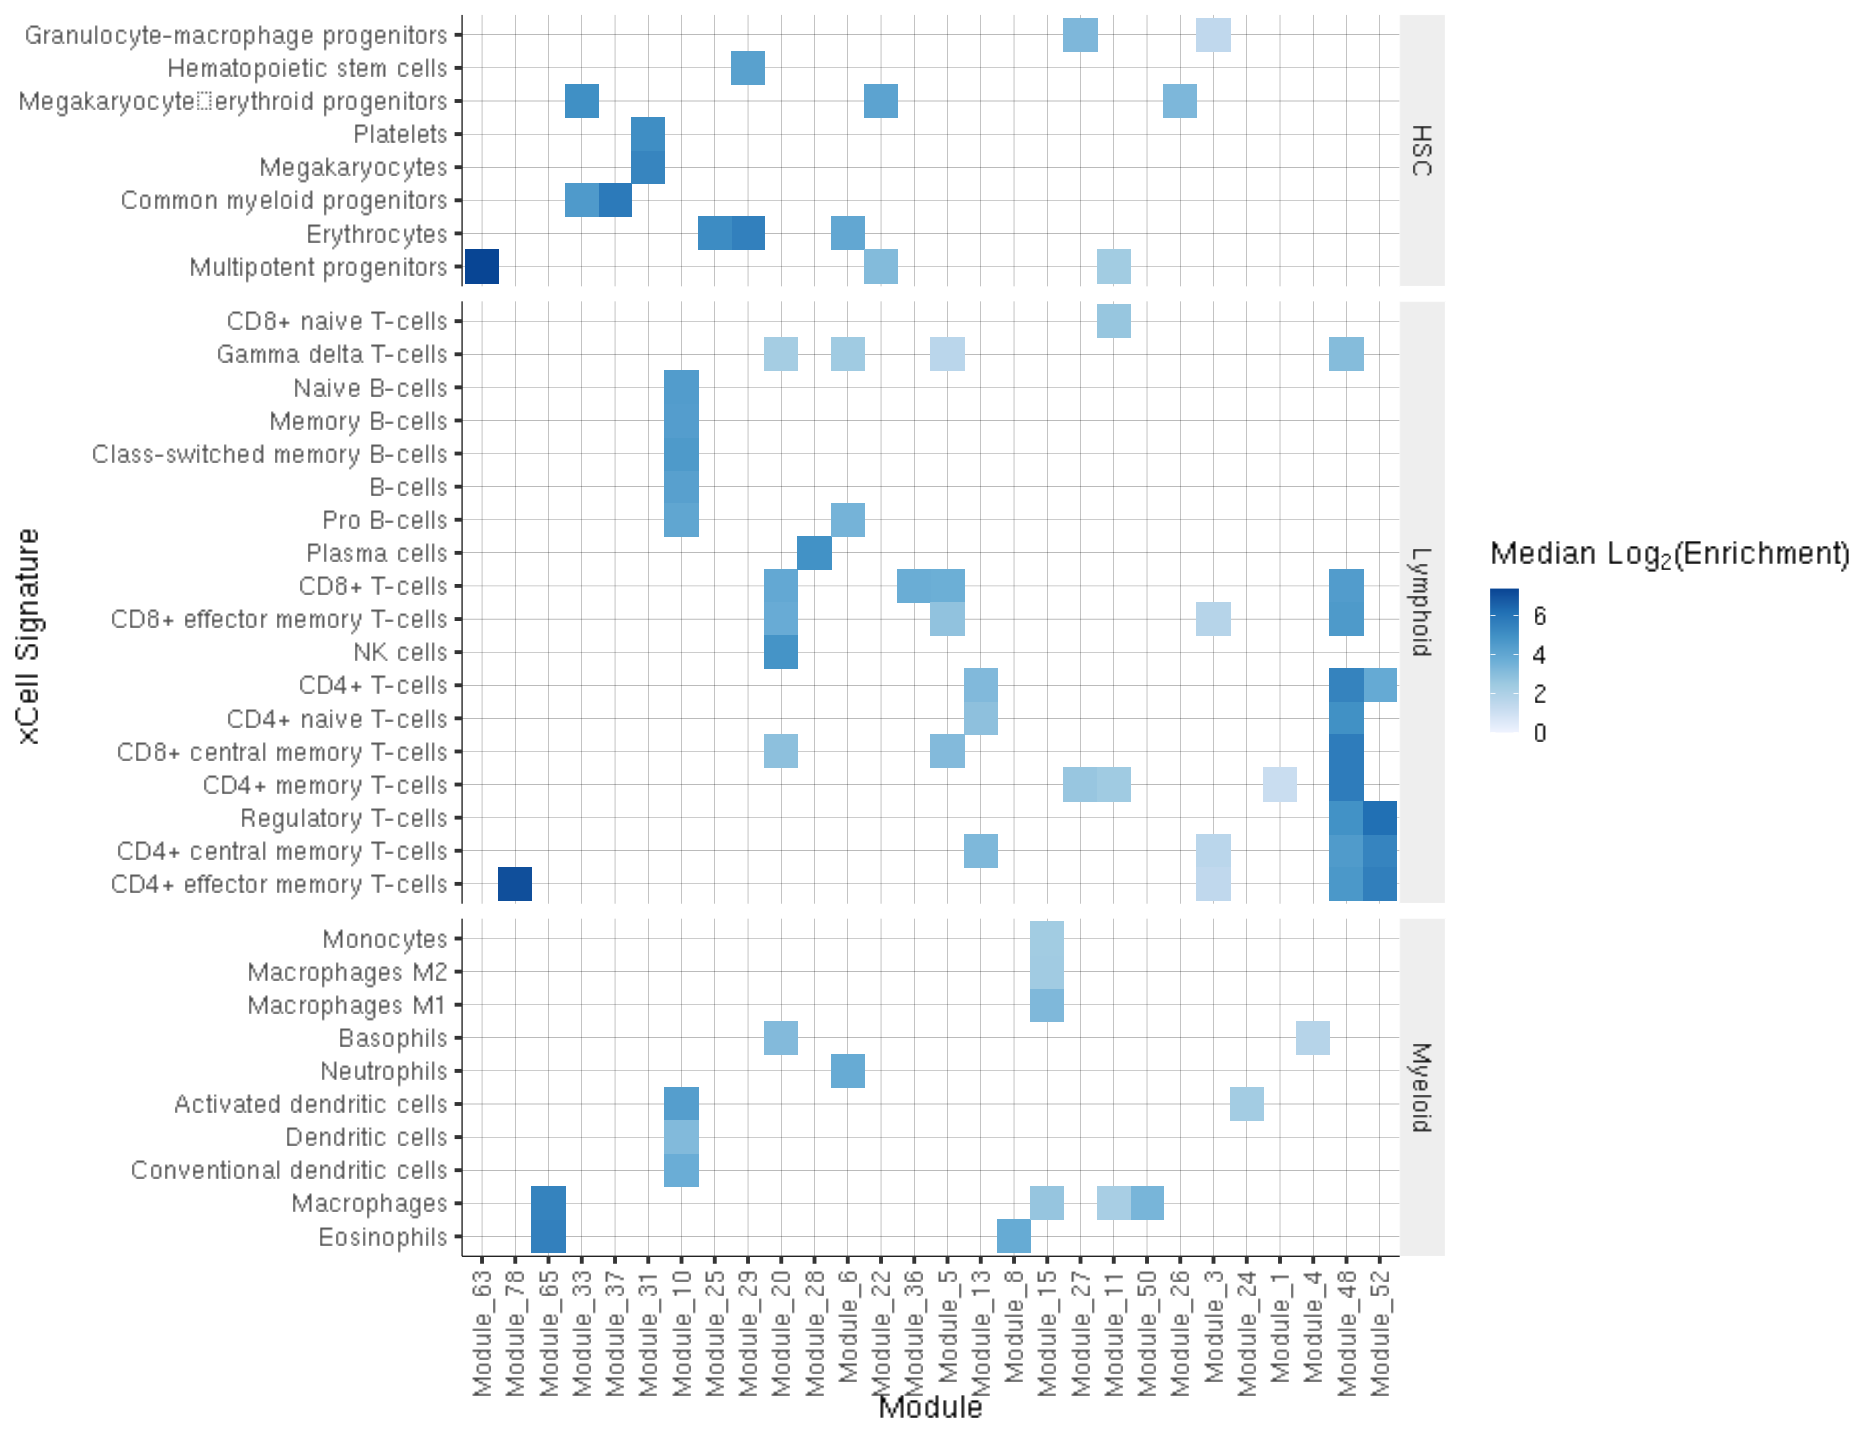

In [35]:
plot.data <- filtered.cell.type.enrichment %>%
    dplyr::mutate(Median.Log.2.Enrichment=log2(Median.Enrichment))  %>%
    merge(., xcell.info, by.x="Cell.Type", by.y="Cell.types") %>%
    dplyr::filter(Subgroup %in% c("HSC", "Lymphoid", "Myeloid"))

h.data <- plot.data %>%
    dplyr::select(Module, Full.name, Median.Enrichment) %>%
    tidyr::spread(Module, Median.Enrichment, fill=0)
rownames(h.data) <- h.data$Full.name
h.data$Full.name <- NULL
h.data <- as.matrix(h.data)

h <- hclust(dist(t(h.data)))
h.o <- hclust(dist(h.data))

options(repr.plot.width=15.5, repr.plot.height=12)

plot.data %>%
    dplyr::mutate(Module=factor(Module, levels=colnames(h.data)[h$order])) %>%
    dplyr::mutate(Full.name=factor(Full.name, levels=rownames(h.data)[h.o$order])) %>%
    ggplot() +
    geom_tile(aes(x=Module, y=Full.name, fill=Median.Log.2.Enrichment)) +
    scale_fill_distiller(palette="Blues", direction=1, limits=c(0, max(plot.data$Median.Log.2.Enrichment))) +
    ylab("xCell Signature") + xlab("Module") +
    labs(fill=bquote("Median Log"[2]*"(Enrichment)")) +
    facet_grid(Subgroup~., scales="free_y", space="free_y") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="right", panel.grid.major=element_line(size=0.05))

ggsave("04_Expression/results/module_xcell_signature_enrichment.svg", width=15.5, height=12)

## Overrepresentation Analysis with Sepsis Signatures

Andrew identified marker genes for all cell types detected from the sepsis scRNA-seq project.

I use Fisher's exact test (which is equivalent to a hypergeometric test with a one-sided alternative). The p-values are adjusted using Benjamini-Hochberg FDR correction. I report the mean, minimum, and maximum odds ratio for significant associations from a given cell type.

In [36]:
# Reduce Modules to Genes with Gene Names
modules.list <- modules %>%
    dplyr::filter(Gene %in% gene.map$Ensembl.ID) %>%
    merge(., gene.map, by.x="Gene", by.y="Ensembl.ID") %>%
    dplyr::select(Gene=gene_name, Module) %>%
    split(., .$Module)

# Split cell type markers
cell.markers <- split(cibersort.markers, cibersort.markers$fine_annot)

In [37]:
ora.results <- list()
ora.results[["Module"]] <- list()
ora.results[["Cell.Type"]] <- list()
ora.results[["Overlap"]] <- list()
ora.results[["N.Gene.Set"]] <- list()
ora.results[["N.Module"]] <- list()
ora.results[["N.Not.Gene.Set"]] <- list()
ora.results[["P.Value"]] <- list()
ora.results[["Module.Overlap.Genes"]] <- list()

counter <- 0

for (module in names(modules.list)) {

    for (cell.type in names(cell.markers)) {
        
        counter <- counter + 1
      
        gene.list = cell.markers[[cell.type]]$gene
        module.list = modules.list[[module]]$Gene

        within.module.and.gene.set = length(intersect(gene.list, module.list))
        within.gene.set = length(intersect(gene.list, gene.map$gene_name))
        not.within.gene.set = length(setdiff(gene.map$gene_name, gene.list))
        within.module = length(module.list)
        
        p.value = phyper(
            within.module.and.gene.set - 1,
            within.gene.set,
            not.within.gene.set,
            within.module,
            lower.tail=F
        )

        ora.results[["Module"]][[counter]] <- module
        ora.results[["Cell.Type"]][[counter]] <- cell.type
        ora.results[["Overlap"]][[counter]] <- within.module.and.gene.set
        ora.results[["N.Gene.Set"]][[counter]] <- within.gene.set
        ora.results[["N.Module"]][[counter]] <- within.module
        ora.results[["N.Not.Gene.Set"]][[counter]] <- not.within.gene.set
        ora.results[["P.Value"]][[counter]] <- p.value
        ora.results[["Module.Overlap.Genes"]][[counter]] <- paste0(intersect(gene.list, module.list), collapse="|")
    }
}

ora.results.df <- as.data.frame(lapply(ora.results, unlist))

cibersort.markers.enrichment <- ora.results.df %>%
    dplyr::mutate(Adjusted.P.Value=p.adjust(P.Value, method="BH")) %>%
    dplyr::filter(Adjusted.P.Value < 0.05) %>%
    dplyr::mutate(Jaccard=Overlap / (N.Gene.Set + N.Module - Overlap)) %>%
    dplyr::mutate(Enrichment=(Overlap / N.Module) / (N.Gene.Set / N.Not.Gene.Set)) %>%
    dplyr::arrange(Module, desc(Jaccard))

In [38]:
write.csv(cibersort.markers.enrichment, "~/gains_team282/nikhil/expression/gene_expression_annotations/sepsis_cell_markers.csv")

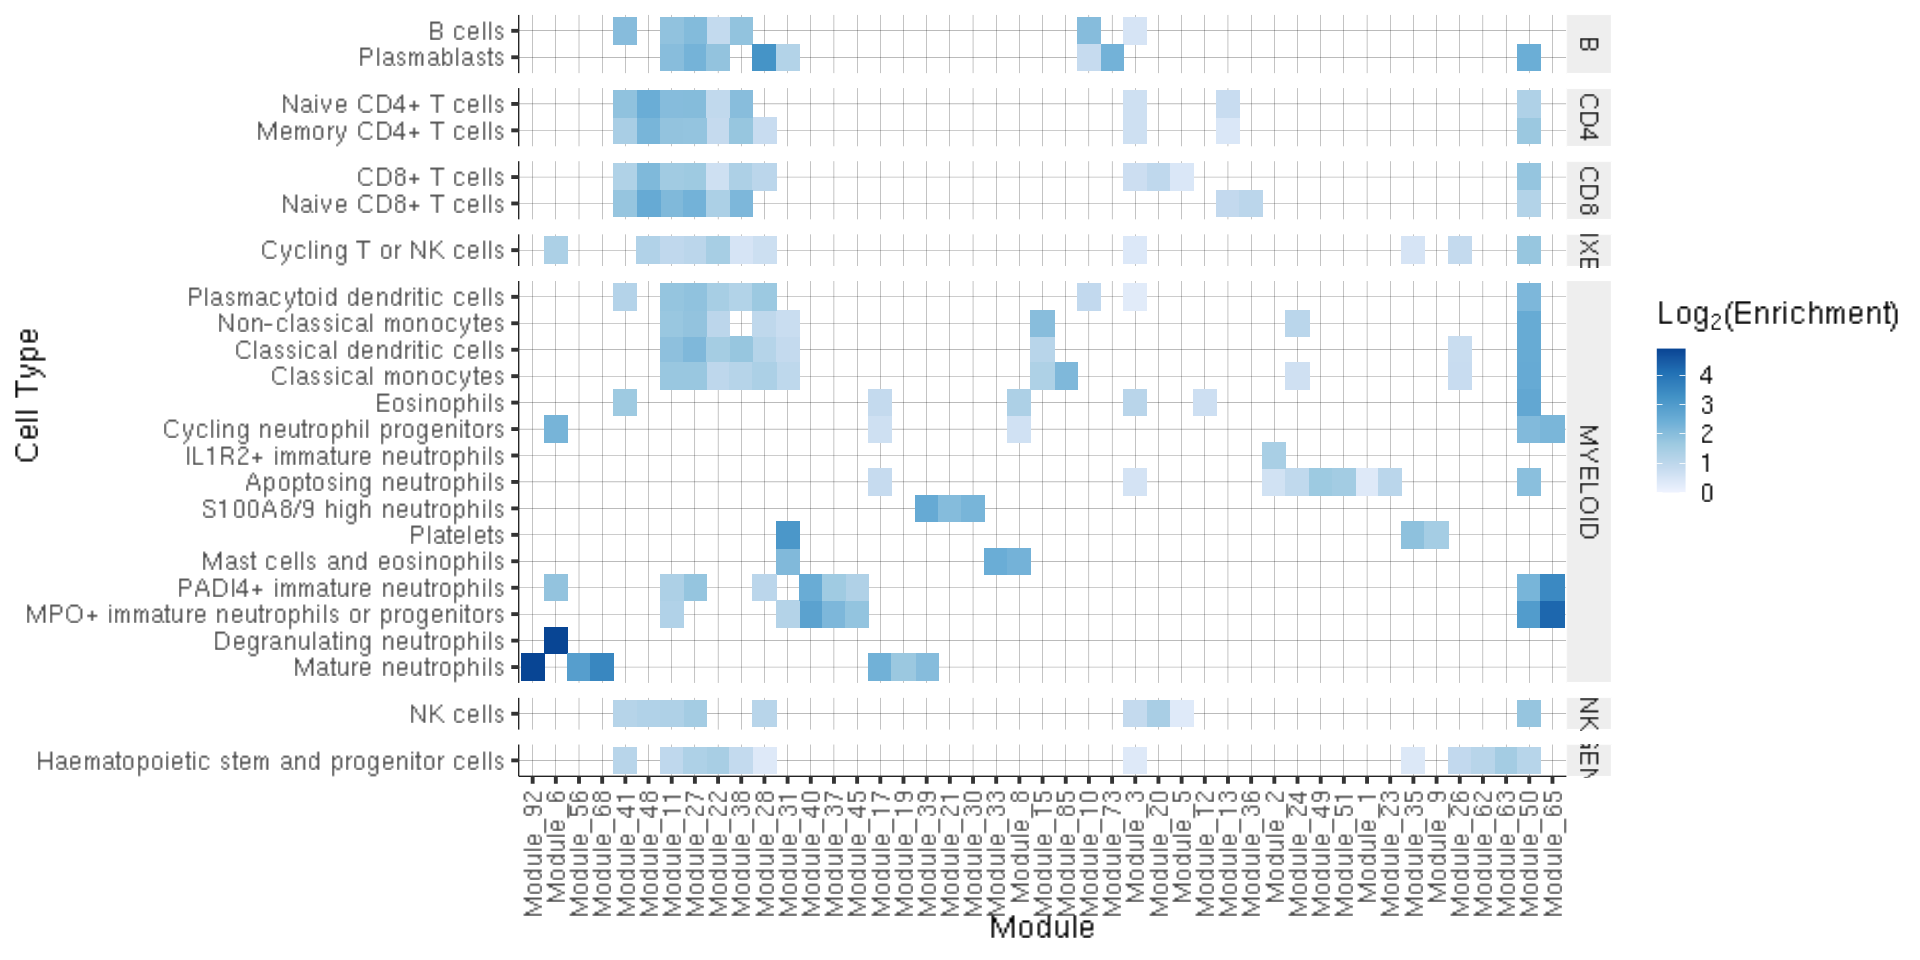

In [39]:
plot.data <- cibersort.markers.enrichment %>%
    dplyr::mutate(Log.2.Enrichment=log2(Enrichment)) %>%
    merge(., cibersort.info, by.x="Cell.Type", by.y="ID")

h.data <- plot.data %>%
    dplyr::select(Module, Name, Enrichment) %>%
    tidyr::spread(Module, Enrichment, fill=0)
rownames(h.data) <- h.data$Name
h.data$Name <- NULL
h.data <- as.matrix(h.data)

h <- hclust(dist(t(h.data)))
h.o <- hclust(dist(h.data))

options(repr.plot.width=16, repr.plot.height=8)

plot.data %>%
    dplyr::mutate(Module=factor(Module, levels=colnames(h.data)[h$order])) %>%
    dplyr::mutate(Name=factor(Name, levels=rownames(h.data)[h.o$order])) %>%
    ggplot() +
    geom_tile(aes(x=Module, y=Name, fill=Log.2.Enrichment)) +
    scale_fill_distiller(palette="Blues", direction=1, limits=c(0, max(plot.data$Log.2.Enrichment))) +
    ylab("Cell Type") + xlab("Module") +
    labs(fill=bquote("Log"[2]*"(Enrichment)")) +
    facet_grid(Lineage~., scales="free_y", space="free_y") +
    ggplot_theme +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="right", panel.grid.major=element_line(size=0.05))

ggsave("04_Expression/results/module_cell_marker_enrichment.svg", width=16, height=8)